In [25]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# Load Data
df = pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\spam.csv", encoding='latin-1')[['v2', 'Label']]
df.columns = ['text', 'label']

In [29]:
# Basic Info
print("Shape:", df.shape)
print("Null values:\n", df.isnull().sum())
print("Label distribution:\n", df['label'].value_counts())

Shape: (5572, 2)
Null values:
 text     0
label    0
dtype: int64
Label distribution:
 label
0    4825
1     747
Name: count, dtype: int64


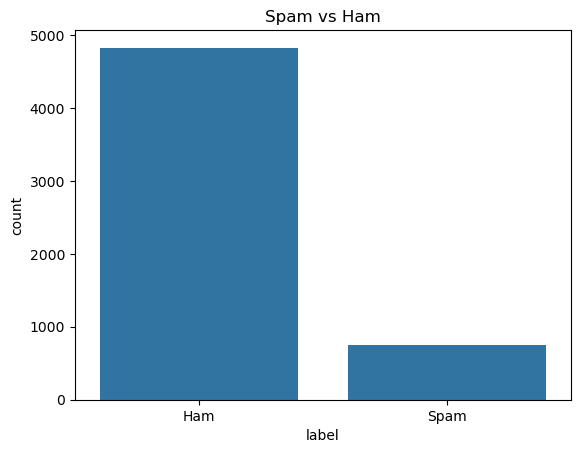

In [31]:
#  Plot Class Distribution
sns.countplot(x=df['label'])
plt.title("Spam vs Ham")
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [33]:
# Text Preprocessing
nltk.download('punkt')
nltk.download('stopwords')

df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True)
df['tokens'] = df['text'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tajud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tajud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
#  Train Word2Vec
model = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [36]:
X = np.vstack(df['tokens'].apply(lambda tokens: 
    np.mean([model.wv[word] for word in tokens if word in model.wv] or [np.zeros(100)], axis=0)
).values)

y = df['label'].values

In [38]:
#  Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Train Classifier

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

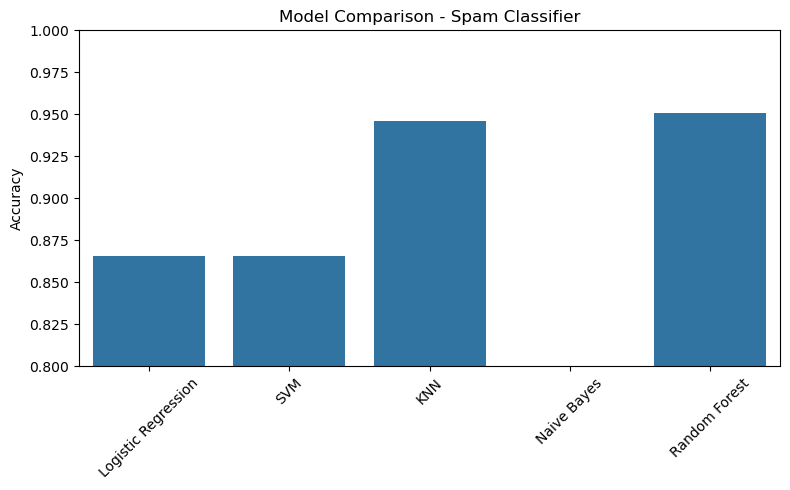

In [43]:
# 📊 Compare Accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.title("Model Comparison - Spam Classifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
best_model = max(accuracies, key=accuracies.get)
print("✅ Best Performing Model:", best_model)
print("🎯 Accuracy:", round(accuracies[best_model] * 100, 2), "%")



✅ Best Performing Model: Random Forest
🎯 Accuracy: 95.07 %
